In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_rows = 100
pd.options.display.max_columns = 999

# Membuat Fungsi Klasifikasi
Dalam fungsi ini akan berisi syntax yang digunakan untuk melakukan klasifikasi data pada kolom "text", dengan cara melakukan filter terhadap kata kunci yang sudah disesuaikan untuk masing-masing klasifikasi.

In [2]:
def Klasifikasi(mode):
    a = (df["text"].str.contains("WNI")) | (df["text"].str.contains("Dokumen")) | (df["text"].str.contains("#NegaraMelindungi")) | (df["text"].str.contains("#Covid19"))
    b = (df["text"].str.contains("Hubungan Diplomatik")) | (df["text"].str.contains("Hubungan Bilateral")) | (df["text"].str.contains("Kerja sama")) | (df["text"].str.contains("#IniDiplomasi")) | (df["text"].str.contains("#SahabatKemlu")) | (df["text"].str.contains("#MenluRetno")) | (df["text"].str.contains("#FMMarsudi")) | (df["text"].str.contains("#RintisKemajuan")) | (df["text"].str.contains("#BatikDiplomacy")) | (df["text"].str.contains("#IndonesianWay")) | (df["text"].str.contains("#DigitalDiplomacy")) | (df["text"].str.contains("#DiplomasiKuliner"))
    c = (df["text"].str.contains("UN / United Nation")) | (df["text"].str.contains("ASEAN")) | (df["text"].str.contains("Kerjasama Multilateral")) | (df["text"].str.contains("Rohingya")) | (df["text"].str.contains("Palestina")) | (df["text"].str.contains("Suriah")) | (df["text"].str.contains("Irak")) | (df["text"].str.contains("ISIS")) | (df["text"].str.contains("#IndonesiaUntukDunia")) | (df["text"].str.contains("#CounterTerrorism")) | (df["text"].str.contains("#DiplomacyforPeaceandProsperity"))
    d = (df["text"].str.contains("Papua")) | (df["text"].str.contains("Sawit")) | (df["text"].str.contains("Perbatasan")) | (df["text"].str.contains("Demokrasi Indonesia")) | (df["text"].str.contains("#BaliDemocracyForum"))
    
    if mode == "A":
        filt = a
    elif mode == "B":
        filt = b
    elif mode == "C":
        filt = c
    elif mode == "D":
        filt = d
    elif mode == "Total":
        filt = (a | b | c | d)
        
    return df.loc[filt][["user_id","screen_name","text","retweet_count","favorite_count","jumlah_rt_like","lang"]]


def Percent_to_Binning(mode):
    # bins = 0-49%, 50-69%, 70-84%, 85-100%
    bins = [0, 49, 69, 84, 100]
    
    # nama label binning
    labels_name = ["Ineffective", "Adequate", "Moderately Effective", "Effetive"]
    
    hasil_clf = Klasifikasi(mode)
    
    if mode == "A":
        hasil_clf["klasifikasi"] = "A"
    elif mode == "B":
        hasil_clf["klasifikasi"] = "B"
    elif mode == "C":
        hasil_clf["klasifikasi"] = "C"
    elif mode == "D":
        hasil_clf["klasifikasi"] = "D"
    
    # tambahkan kolom "percent" yang berisi percent jumlah retweet dan like terhadap jumlah maksimal
    hasil_clf["percent"] = hasil_clf["jumlah_rt_like"] / hasil_clf["jumlah_rt_like"].max() * 100
    
    # tambahkan kolom "scoring_to_clf" yang berisi binning dari data percent
    hasil_clf["scoring_to_clf"] = pd.cut(hasil_clf["percent"], bins, labels=labels_name)
    
    return hasil_clf

Dalam notebook kali ini, saya akan melakukan cleaning data kembali. Digunakan untuk mengurangi jumlah data dari 59rb data menjadi sekitar 18rb data. Data hasil cleaning adalah data yang sudah dipastikan masuk dalam klasifikasi.<br>
Karena pada data sebelumnya yang berjumlah 59rb data, tidak semua data tersebut masuk ke dalam klasifikasi, hanya 18rb data yang dipastikan masuk dalam klasifikasi.<br>

# Import Datasets
Import datasets file gabungan yang berjumlah 59rb

In [3]:
df = pd.read_csv("gabungan_file.csv")
df.drop(columns="Unnamed: 0", inplace=True)

# Tambahkan kolom baru "jumlah_rt_like" yang berisi jumlah retweet + jumlah like
df["jumlah_rt_like"] = df["retweet_count"] + df["favorite_count"]

# df baru adalah semua data yang masuk klasifikasi
df = Klasifikasi("Total")

# bikin index ulang.
df = df.reset_index()

# hapus colom index lama.
df.drop(columns="index", inplace=True)

# tampilkan df
df

,user_id,screen_name,text,retweet_count,favorite_count,jumlah_rt_like,lang
0,3314172242,IndonesiaHanoi,“History has taught us that crisis may also cr...,41,0,41,en
1,3314172242,IndonesiaHanoi,@IndonesiaHanoi will organize an Online Sessio...,1,1,2,en
2,3314172242,IndonesiaHanoi,#HAPPYASEANDAY2020 : ASEAN Foreign Minister re...,33,0,33,en
3,3314172242,IndonesiaHanoi,"On 7/8, Ambassador Ibnu Hadi attended the ASEA...",2,6,8,en
4,3314172242,IndonesiaHanoi,The ASEAN caught up with four older individual...,4,0,4,en
...,...,...,...,...,...,...,...
18947,2964714444,kbrisingapura,Good Morning! We would like to start the day b...,44,0,44,en
18948,2964714444,kbrisingapura,"11. Sejak dilakukannya intensifikasi evakuasi,...",12,0,12,in
18949,2964714444,kbrisingapura,10. 2 diplomat&amp; WNI yang terluka telah men...,10,0,10,in
18950,2964714444,kbrisingapura,9. Kemlu telah menginstruksikan kepada KBRI da...,8,0,8,in


# Hasil Percent dan Binning data
buat dataFrame baru yang berisi data untuk masing-masing klasifikasi, kemudian gabungkan semua data klasifikasi tersebut menjadi satu dataFrame baru.

In [4]:
a = Percent_to_Binning("A")
b = Percent_to_Binning("B")
c = Percent_to_Binning("C")
d = Percent_to_Binning("D")

# buat dataframe baru untuk menampung hasil semua klasifikasi
df_baru = pd.concat([a, b, c, d])

# bikin index ulang.
df_baru = df_baru.reset_index()

# hapus colom index lama.
df_baru.drop(columns="index", inplace=True)

# Cek DataFrame hasil klasifikasi
### A

In [5]:
a

,user_id,screen_name,text,retweet_count,favorite_count,jumlah_rt_like,lang,klasifikasi,percent,scoring_to_clf
31,3314172242,IndonesiaHanoi,Global update on #COVID19 and Indonesian citiz...,1,0,1,en,A,0.010311,Ineffective
38,3314172242,IndonesiaHanoi,Global update on #COVID19 and Indonesian citiz...,1,0,1,en,A,0.010311,Ineffective
43,3314172242,IndonesiaHanoi,"Hai #SahabatKemlu, yuk simak persembahan #Teri...",60,0,60,in,A,0.618684,Ineffective
45,3314172242,IndonesiaHanoi,Global update on #COVID19 and Indonesian citiz...,1,1,2,en,A,0.020623,Ineffective
47,3314172242,IndonesiaHanoi,Global update on #COVID19 and Indonesian citiz...,2,5,7,en,A,0.072180,Ineffective
...,...,...,...,...,...,...,...,...,...,...
18937,2964714444,kbrisingapura,Kepada WNI di Singapura yang akan hadir pada u...,1,1,2,in,A,0.020623,Ineffective
18948,2964714444,kbrisingapura,"11. Sejak dilakukannya intensifikasi evakuasi,...",12,0,12,in,A,0.123737,Ineffective
18949,2964714444,kbrisingapura,10. 2 diplomat&amp; WNI yang terluka telah men...,10,0,10,in,A,0.103114,Ineffective
18950,2964714444,kbrisingapura,9. Kemlu telah menginstruksikan kepada KBRI da...,8,0,8,in,A,0.082491,Ineffective


### B

In [6]:
b

,user_id,screen_name,text,retweet_count,favorite_count,jumlah_rt_like,lang,klasifikasi,percent,scoring_to_clf
0,3314172242,IndonesiaHanoi,“History has taught us that crisis may also cr...,41,0,41,en,B,2.733333,Ineffective
1,3314172242,IndonesiaHanoi,@IndonesiaHanoi will organize an Online Sessio...,1,1,2,en,B,0.133333,Ineffective
8,3314172242,IndonesiaHanoi,With the aim of introducing #Indonesian cultur...,1,3,4,en,B,0.266667,Ineffective
9,3314172242,IndonesiaHanoi,@IndonesiaHanoi will hold “Online Session on E...,1,2,3,en,B,0.200000,Ineffective
10,3314172242,IndonesiaHanoi,"Dear #IACS Alumni, \r\n\r\nlet’s get together ...",1,1,2,en,B,0.133333,Ineffective
...,...,...,...,...,...,...,...,...,...,...
18919,2964714444,kbrisingapura,Manfaatkan gadget u/ maksimalkan #DigitalDiplo...,14,0,14,in,B,0.933333,Ineffective
18920,2964714444,kbrisingapura,Workshop Pengelolaan Media Digital Kemlu &amp;...,12,0,12,in,B,0.800000,Ineffective
18923,2964714444,kbrisingapura,Great meeting with @Portal_Kemlu_RI #MenluRetn...,14,0,14,en,B,0.933333,Ineffective
18924,2964714444,kbrisingapura,#MenluRetno dan senior editor media Australia ...,10,0,10,in,B,0.666667,Ineffective


### C

In [7]:
c

,user_id,screen_name,text,retweet_count,favorite_count,jumlah_rt_like,lang,klasifikasi,percent,scoring_to_clf
0,3314172242,IndonesiaHanoi,“History has taught us that crisis may also cr...,41,0,41,en,C,0.119736,Ineffective
2,3314172242,IndonesiaHanoi,#HAPPYASEANDAY2020 : ASEAN Foreign Minister re...,33,0,33,en,C,0.096373,Ineffective
3,3314172242,IndonesiaHanoi,"On 7/8, Ambassador Ibnu Hadi attended the ASEA...",2,6,8,en,C,0.023363,Ineffective
4,3314172242,IndonesiaHanoi,The ASEAN caught up with four older individual...,4,0,4,en,C,0.011682,Ineffective
5,3314172242,IndonesiaHanoi,"On 8th of August 2020, @ASEAN will celebrate i...",2,3,5,en,C,0.014602,Ineffective
...,...,...,...,...,...,...,...,...,...,...
18932,2964714444,kbrisingapura,"Delri (Kemensos) hadiri ""Long-term Care for El...",1,0,1,en,C,0.002920,Ineffective
18933,2964714444,kbrisingapura,Delri dipimpin Jusuf Wanandi didampingi Asdep ...,1,0,1,in,C,0.002920,Ineffective
18934,2964714444,kbrisingapura,MinCouns Tjoki S. mewakili Dubes RI dihadapan ...,1,0,1,in,C,0.002920,Ineffective
18935,2964714444,kbrisingapura,Kesiapan Indonesia Menghadapi Masyarakat ASEAN...,1,0,1,in,C,0.002920,Ineffective


### D

In [8]:
d

,user_id,screen_name,text,retweet_count,favorite_count,jumlah_rt_like,lang,klasifikasi,percent,scoring_to_clf
283,3314172242,IndonesiaHanoi,"Pd Minggu (15/09), telah dlaksanakan Kegiatan ...",1,1,2,in,D,0.020676,Ineffective
295,3314172242,IndonesiaHanoi,"Pada Sabtu (07/09), sekitar 50 #WargaNegaraInd...",1,2,3,in,D,0.031014,Ineffective
391,3314172242,IndonesiaHanoi,Indonesian Arts and Culture Scholarship (IACS)...,46,0,46,in,D,0.475551,Ineffective
398,3314172242,IndonesiaHanoi,Duka cita yang mendalam bagi para Pahlawan Dem...,830,0,830,in,D,8.580585,Ineffective
634,3314172242,IndonesiaHanoi,45. Kelompok separatisme dan pendukungnya haru...,21,0,21,in,D,0.217099,Ineffective
...,...,...,...,...,...,...,...,...,...,...
18943,2964714444,kbrisingapura,Fact #4: All Papuans are free to travel overse...,58,0,58,en,D,0.599607,Ineffective
18944,2964714444,kbrisingapura,Revised Fact #3: Claims by ULMWP of rampant Hu...,36,0,36,en,D,0.372170,Ineffective
18945,2964714444,kbrisingapura,Fact #2: Indonesian is home to 11 million Mela...,58,0,58,in,D,0.599607,Ineffective
18946,2964714444,kbrisingapura,Fact #1: West Papua is an integral part of Ind...,58,0,58,en,D,0.599607,Ineffective


# Melihat semua data yang sudah masuk ke dalam dataframe df_baru

In [15]:
df_baru

,user_id,screen_name,text,retweet_count,favorite_count,jumlah_rt_like,lang,klasifikasi,percent,scoring_to_clf
0,3314172242,IndonesiaHanoi,Global update on #COVID19 and Indonesian citiz...,1,0,1,en,A,0.010311,Ineffective
1,3314172242,IndonesiaHanoi,Global update on #COVID19 and Indonesian citiz...,1,0,1,en,A,0.010311,Ineffective
2,3314172242,IndonesiaHanoi,"Hai #SahabatKemlu, yuk simak persembahan #Teri...",60,0,60,in,A,0.618684,Ineffective
3,3314172242,IndonesiaHanoi,Global update on #COVID19 and Indonesian citiz...,1,1,2,en,A,0.020623,Ineffective
4,3314172242,IndonesiaHanoi,Global update on #COVID19 and Indonesian citiz...,2,5,7,en,A,0.072180,Ineffective
...,...,...,...,...,...,...,...,...,...,...
23184,2964714444,kbrisingapura,Fact #4: All Papuans are free to travel overse...,58,0,58,en,D,0.599607,Ineffective
23185,2964714444,kbrisingapura,Revised Fact #3: Claims by ULMWP of rampant Hu...,36,0,36,en,D,0.372170,Ineffective
23186,2964714444,kbrisingapura,Fact #2: Indonesian is home to 11 million Mela...,58,0,58,in,D,0.599607,Ineffective
23187,2964714444,kbrisingapura,Fact #1: West Papua is an integral part of Ind...,58,0,58,en,D,0.599607,Ineffective


B    12877
C     4783
A     4714
D      815
Name: klasifikasi, dtype: int64


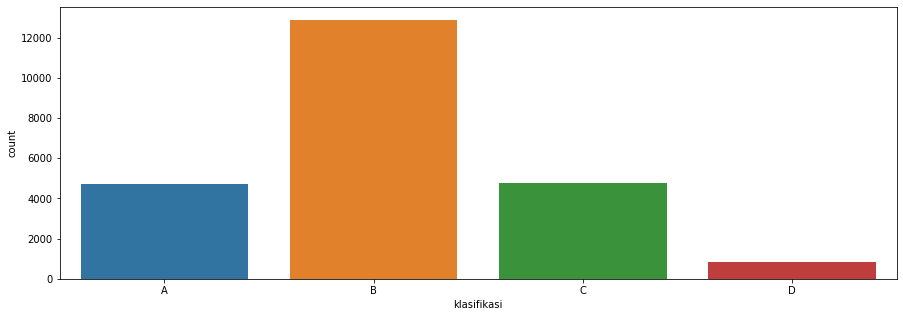

In [10]:
print(df_baru["klasifikasi"].value_counts())
plt.figure(figsize=(15, 5))
ax = sns.countplot(x="klasifikasi", data=df_baru)